# Subject: Data Science Foundation

## Session 8 - Probability distributions

### Exercise 1 -  Confidence Intervals

- Considering the Sampling Distributions and The Central Limit Theorem in Demo 2 develop the confidence intervals for the distribution of Population heights Catalunya.

- Interpret and discuss the Results. 
- Commit scripts in your GitHub account. You should export your solution code (.ipynb notebook) and push it to your repository “DataScienceFoundations”.

- The following are the tasks that should complete and synchronize with your repository “DataScienceFoundations” until November 01. Please notice that none of these tasks is graded, however it’s important that you correctly understand and complete them in order to be sure that you won’t have problems with further assignments.

# Import modules and read the distributions of Population and Sample heights

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [2]:
np.random.seed(10) # With the seed reset (every time), the same set of numbers will appear every time.
population_heights1 = stats.poisson.rvs(loc=10, mu=20, size=100000)
population_heights2 = stats.poisson.rvs(loc=10, mu=10, size=50000)
population_heights = np.concatenate((population_heights1, population_heights2))

0.037268932534228444


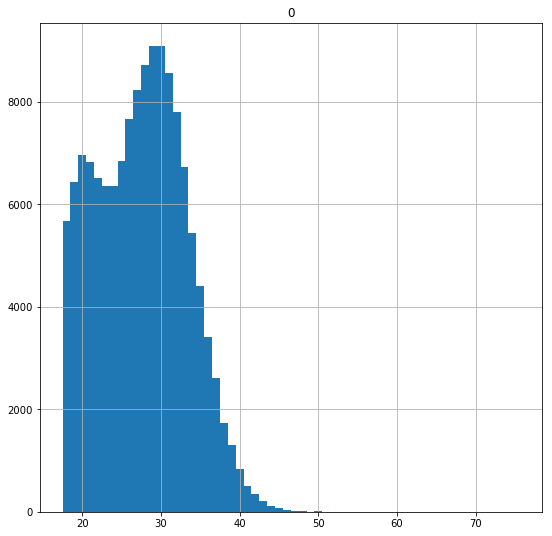

In [5]:
pd.DataFrame(population_heights).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(population_heights) )

In [ ]:
#Fer comentari del tipus:
#The distribution has low skewness, but the plot reveals the data is clearly not normal:
#instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks.
#The sample we drew from this population should have roughly the same shape and skew:

In [6]:
np.random.seed(6)
sample_heights = np.random.choice(a= population_heights,
                               size=500)            # Sample 500 values

print ( population_heights.mean() )                         # Show population mean
print ( sample_heights.mean() )                         # Show sample mean

population_heights.mean() - sample_heights.mean()   # Check difference between means

26.66948
26.804


-0.13451999999999842

In [ ]:
#Fer comentari del tipus:
#Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years,
#but it is close. This illustrates an important point:
#we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

0.17849197312762627


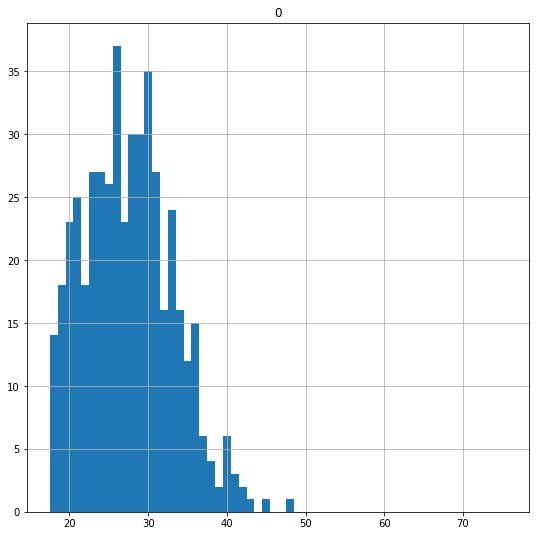

In [7]:
pd.DataFrame(sample_heights).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,9))

print( stats.skew(sample_heights) )

In [ ]:
#Fer comentari del tipus:
#The sample has roughly the same shape as the underlying population.
#This suggests that we can't apply techniques that assume a normal distribution to this data set,
#since it is not normal. In reality, we can, thanks the central limit theorem.
#The central limit theorem is one of the most important results of probability theory and serves
#as the foundation of many methods of statistical analysis.
#At a high level, the theorem states the distribution of many sample means, known as a sampling distribution,
#will be normally distributed. This rule holds even if the underlying distribution itself is not normally distributed.
#As a result we can treat the sample mean as if it were drawn normal distribution.

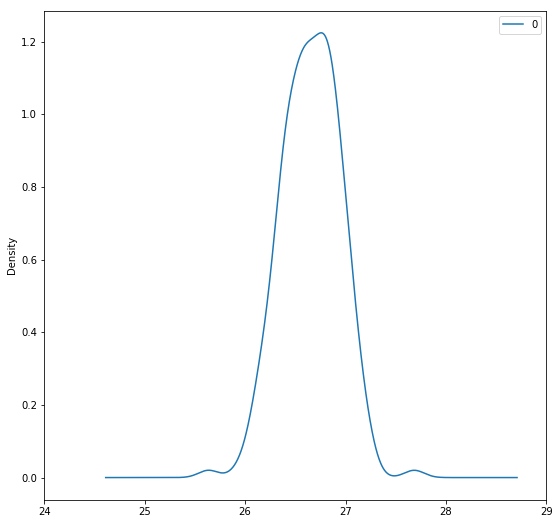

In [10]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_heights, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(24,29))  

In [9]:
point_estimates

[26.885999999999999,
 26.998000000000001,
 26.238,
 26.568000000000001,
 26.489999999999998,
 26.629999999999999,
 26.808,
 26.77,
 27.128,
 26.436,
 26.834,
 26.416,
 26.687999999999999,
 26.289999999999999,
 26.268000000000001,
 26.568000000000001,
 26.882000000000001,
 26.056000000000001,
 27.059999999999999,
 27.684000000000001,
 26.972000000000001,
 26.829999999999998,
 27.196000000000002,
 26.154,
 27.207999999999998,
 26.488,
 26.366,
 26.382000000000001,
 26.431999999999999,
 27.094000000000001,
 26.968,
 26.611999999999998,
 27.085999999999999,
 26.550000000000001,
 26.786000000000001,
 26.308,
 26.678000000000001,
 26.754000000000001,
 26.629999999999999,
 26.748000000000001,
 26.681999999999999,
 26.702000000000002,
 26.911999999999999,
 26.469999999999999,
 25.635999999999999,
 26.890000000000001,
 26.324000000000002,
 26.693999999999999,
 26.141999999999999,
 26.568000000000001,
 26.797999999999998,
 26.905999999999999,
 26.684000000000001,
 26.600000000000001,
 26.3960000

In [ ]:
#Per comentari del tipus:
#The sampling distribution appears to be roughly normal,
#despite the bimodal population distribution that the samples were drawn from.
#In addition, the mean of the sampling distribution approaches the true population mean:

In [11]:
population_heights.mean() - np.array(point_estimates).mean()

0.014670000000002403

In [12]:
population_heights.mean()

26.66948

In [13]:
np.array(point_estimates).mean()

26.654809999999998

## Question: Indicate the confidence intervals.

> Put your code and answer here

In [14]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_heights, size = sample_size)
sample_mean = sample.mean()

In [15]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_heights, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

pop_stdev = population_heights.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.95996398454
Confidence interval:
(26.555906015978749, 27.328093984021251)


In [ ]:
#Comentari del tipus:
#*Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the distribution has two tails.
#Notice that the confidence interval we calculated captures the true population mean of 43.0023.

In [16]:
print ( population_heights.mean() )

26.66948
